<a href="https://colab.research.google.com/github/aqafridi/DeepLearning/blob/main/Cifar10_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

#Loading Data
**load data to training set and testing set**

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#checking size

In [37]:
print('x_train shape:  '+ str(x_train.shape))
print('x_test shape: '+ str(x_test.shape))
print('y_train shape: '+ str(y_train.shape[0]))
print('x_test shape: '+ str(x_test.shape[0]))

x_train shape:  (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: 50000
x_test shape: 10000


#normalizing data


In [38]:
x_train, x_test = x_train / 255, x_test / 255
y_train = y_train.flatten();y_test = y_test.flatten()
print('x_train shape:  '+ str(x_train.shape))
print('x_test shape: '+ str(x_test.shape))

x_train shape:  (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


#Classes for model

In [39]:
classes = len(set(y_train))
print(classes)

10


#building Model for CNN

In [71]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Conv2D(filters=128,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Flatten(),

    Dropout(0.5),

    Dense(units=1024,activation='relu'),

    Dropout(0.5),

    Dense(units=classes,activation='softmax')

    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [72]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
flatten_9 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 86528)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              88605696  
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)             

In [73]:
num_epochs=20

In [74]:
result= model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=num_epochs)

Epoch 1/20
1563/1563 [==============================] - 42s 26ms/step - loss: 1.7119 - accuracy: 0.3809 - val_loss: 1.1649 - val_accuracy: 0.5810
Epoch 2/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1205 - accuracy: 0.6028 - val_loss: 0.9470 - val_accuracy: 0.6670
Epoch 3/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8993 - accuracy: 0.6862 - val_loss: 0.8960 - val_accuracy: 0.6876
Epoch 4/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7163 - accuracy: 0.7490 - val_loss: 0.8553 - val_accuracy: 0.7087
Epoch 5/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5708 - accuracy: 0.8044 - val_loss: 0.9279 - val_accuracy: 0.6933
Epoch 6/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.4502 - accuracy: 0.8428 - val_loss: 0.9865 - val_accuracy: 0.7005
Epoch 7/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.3560 - accuracy: 0.8770 - val_loss: 0.9634 -

#Plot the loss

Text(0.5, 0, 'Epoch')

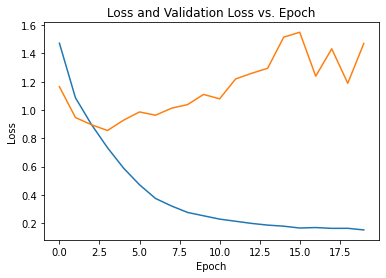

In [75]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

#Plot the accuracy

Text(0.5, 0, 'Epoch')

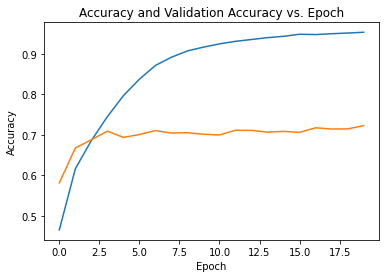

In [76]:
# Plot the accuracy
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

#Plot confusion matrix

Text(33.0, 0.5, 'True Label')

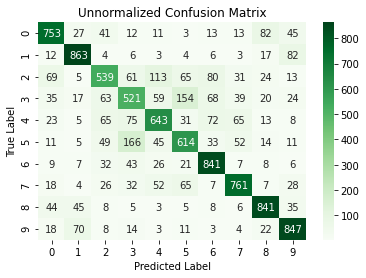

In [77]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='Greens')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")


# label mapping

In [78]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()